In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins

%matplotlib inline
plt.style.use('seaborn-white')


In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression


In [226]:
# Replace the path with the correct path for your data.
df = pd.read_csv('/Users/mille/Desktop/Advanced Regression/cmc.csv')


Information on the dataset

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.names

Attribute Information:

Wife's age (numerical)
Wife's education (categorical) 1=low, 2, 3, 4=high
Husband's education (categorical) 1=low, 2, 3, 4=high
Number of children ever born (numerical)
Wife's religion (binary) 0=Non-Islam, 1=Islam
Wife's now working? (binary) 0=Yes, 1=No
Husband's occupation (categorical) 1, 2, 3, 4
Standard-of-living index (categorical) 1=low, 2, 3, 4=high
Media exposure (binary) 0=Good, 1=Not good
Contraceptive method used (class attribute) 1=No-use
                                             2=Long-term
                                             3=Short-term
Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of Prediction Accuracy, Complexity, and Training Time of Thirty-three Old and New Classification Algorithms. Machine Learning.

In [227]:
df.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
Wife_age                        1473 non-null int64
Wife_education                  1473 non-null int64
Husband_education               1473 non-null int64
Number_of_childern_ever_born    1473 non-null int64
Wife_religion                   1473 non-null int64
Wife_now_working                1473 non-null int64
Husband_occupation              1473 non-null int64
Standard_of_living_index        1473 non-null int64
Media_exposure                  1473 non-null int64
Contraceptive method_used       1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


In [229]:
df.describe()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


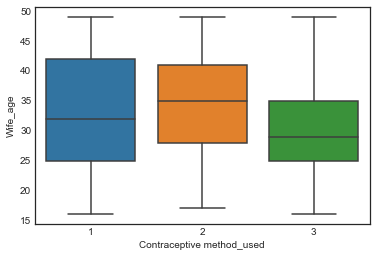

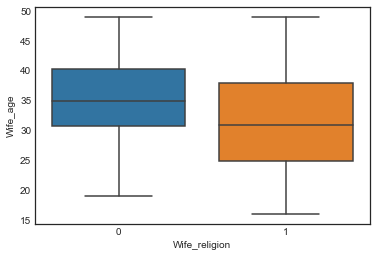

C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


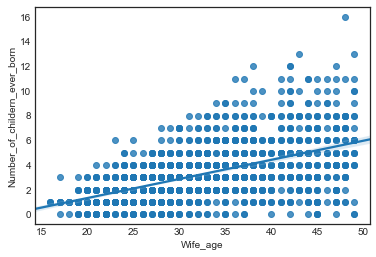

In [230]:
# Prettier plots are better.
sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="Contraceptive method_used", y="Wife_age", data=df)
plt.show()
sns.boxplot(x="Wife_religion", y="Wife_age", data=df)
plt.show()

# Relationship between predictors.
sns.regplot(x='Wife_age', y='Number_of_childern_ever_born', data=df)
plt.show()

***Vanilla Logistic Regression***



In [231]:
# Declare predictors.
X_statsmod = df[['Number_of_childern_ever_born', 'Wife_age']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(df['Wife_now_working'], X_statsmod)
result = logit.fit()
#clear values 0 or 1 

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.551948
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       Wife_now_working   No. Observations:                 1473
Model:                          Logit   Df Residuals:                     1470
Method:                           MLE   Df Model:                            2
Date:                Sat, 16 Mar 2019   Pseudo R-squ.:                 0.01945
Time:                        21:40:59   Log-Likelihood:                -813.02
converged:                       True   LL-Null:                       -829.14
                                        LLR p-value:                 9.954e-08
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Number_of_childern_ever_born     0.1726      0.033      5.270      0.000

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X = df[['Wife_age', 'Wife_education', 'Husband_education','Number_of_childern_ever_born', 'Wife_religion', 'Wife_now_working', 'Husband_occupation', 'Media_exposure', 'Standard_of_living_index']]
y = df['Contraceptive method_used']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [237]:
predictions = logmodel.predict(X_test)

In [238]:
from sklearn.metrics import classification_report

In [239]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.56      0.67      0.61       206
           2       0.61      0.28      0.39       120
           3       0.45      0.51      0.48       161

   micro avg       0.52      0.52      0.52       487
   macro avg       0.54      0.49      0.49       487
weighted avg       0.53      0.52      0.51       487



***Logistic Lasso Regression***

In [240]:
# Declare a lasso regression classifier.
lasso_reg = LogisticRegression(penalty='l1', C=20)

# Fit the model.
lasso_fit = lasso_reg.fit(X, y)

# Display.
print('Coefficients')
print(lasso_fit.coef_)
print(lasso_fit.intercept_)
pred_y_sklearn = lasso_reg.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lasso_reg.score(X, y))

Coefficients
[[ 8.08289165e-02 -5.45217734e-01 -1.09077923e-02 -3.39869784e-01
   3.88742090e-01 -1.24079788e-01 -7.49753287e-02  4.68796668e-01
  -2.63358169e-01]
 [ 8.99397021e-05  7.21853307e-01 -1.07612209e-01  1.83418042e-01
  -3.60013459e-01 -6.17855843e-02 -1.78259742e-01 -2.72247795e-01
   2.25749066e-01]
 [-9.21206168e-02  8.97153425e-02  8.59925924e-02  2.25695887e-01
  -1.30169012e-01  1.50325718e-01  2.20958139e-01 -4.06692365e-01
   1.22384455e-01]]
[ 0.52930056 -3.78275741  0.15927147]

 Accuracy by admission status
Contraceptive method_used    1    2    3
row_0                                   
1                          414  108  191
2                           40  106   76
3                          175  119  244

 Percentage accuracy
0.5186693822131704


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


***Lasso Regression Scores***

In [241]:
lasso_scores = cross_val_score(lasso_reg, X, y, cv=10)
print(lasso_scores)

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

[0.51006711 0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]


In [242]:
# Mean accuracy has improved slightly with penalty='l1' and C set to 20
avg_lasso = np.mean(lasso_scores)
print(np.mean(avg_lasso))

0.5064444807414902


***Logistic Ridge Regression***

In [247]:
# Declare a ridge regression classifier.
ridge_reg = LogisticRegression(penalty='l2', C=20)

# Fit the model.
ridge_fit = ridge_reg.fit(X, y)

# Display.
print('Coefficients')
print(ridge_fit.coef_)
print(ridge_fit.intercept_)
pred_y_sklearn = ridge_reg.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(ridge_reg.score(X, y))

Coefficients
[[ 8.07726614e-02 -5.45605691e-01 -1.18820681e-02 -3.39964559e-01
   3.88736681e-01 -1.25434012e-01 -7.62515585e-02  4.68824601e-01
  -2.63745229e-01]
 [-2.20001884e-04  7.20239571e-01 -1.13256495e-01  1.83436505e-01
  -3.66510213e-01 -6.21725475e-02 -1.81832439e-01 -2.88145444e-01
   2.23772449e-01]
 [-9.23318150e-02  8.91075788e-02  8.47857856e-02  2.25992802e-01
  -1.34268759e-01  1.50110673e-01  2.19677549e-01 -4.10469072e-01
   1.21888644e-01]]
[ 0.54097871 -3.72654213  0.17931737]

 Accuracy by admission status
Contraceptive method_used    1    2    3
row_0                                   
1                          414  108  191
2                           40  104   76
3                          175  121  244

 Percentage accuracy
0.5173116089613035


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
Accuracy by admission status
Contraceptive method_used    1    2    3
row_0                                   
1                          414  108  191
2                           40  106   76
3                          175  119  244

***Ridge regression scores***



In [248]:
ridge_scores = cross_val_score(ridge_reg, X, y, cv=10)
print(ridge_scores)

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]


In [249]:
# Meh - penalty='l2' and C set to 20
avg_ridge = np.mean(ridge_scores)
print(np.mean(avg_ridge))

0.5051021988622956


***Logistic Regression Classifier***

In [250]:
def main(c):
    print('C = ', c)
    # Declare a logistic regression classifier
    log_reg = LogisticRegression()

    # Fit the model.
    log_reg_fit = log_reg.fit(X, y)

    log_reg_scores = cross_val_score(log_reg, X, y, cv=10)
    print('Logistic scores: ')
    print(log_reg_scores)

    avg_log_reg = np.mean(log_reg_scores)
    print('Avg of Logistic scores')
    print(np.mean(avg_log_reg))
    print()
    
        # Declare a lasso regression classifier.
    lasso_reg = LogisticRegression(penalty='l1', C=c)

    # Fit the model.
    lasso_fit = lasso_reg.fit(X, y)

    lasso_scores = cross_val_score(lasso_reg, X, y, cv=10)
    print('Lasso scores: ')
    print(lasso_scores)

    avg_lasso = np.mean(lasso_scores)
    print('Avg of Lasso scores: ')
    print(np.mean(avg_lasso))
    print()
    
    
    # Declare a ridge regression classifier.
    ridge_reg = LogisticRegression(penalty='l2', C=c)

    # Fit the model.
    ridge_fit = ridge_reg.fit(X, y)

    ridge_scores = cross_val_score(ridge_reg, X, y, cv=10)
    print('Ridge scores: ')
    print(ridge_scores)

    avg_ridge = np.mean(ridge_scores)
    print('Avg of Ridge scores: ')
    print(np.mean(avg_ridge))
    print()
    
    

In [251]:
for i in np.arange(16, 26, 1):
    main(i)

C =  16
Logistic scores: 
[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Lasso scores: 
[0.5033557  0.53378378 0.5        0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5071292875864121



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Ridge scores: 
[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956

C =  17


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Logistic scores: 
[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will 

Lasso scores: 
[0.51006711 0.53378378 0.50675676 0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5084761042016851

Ridge scores: 

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch


[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956

C =  18
Logistic scores: 
[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Lasso scores: 
[0.51006711 0.53378378 0.5        0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5078004285260095



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Ridge scores: 
[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956

C =  19


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Logistic scores: 
[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Lasso scores: 
[0.5033557  0.53378378 0.5        0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5071292875864121



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Ridge scores: 
[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956

C =  20


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Logistic scores: 
[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Lasso scores: 
[0.51006711 0.53378378 0.5        0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5078004285260095



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Ridge scores: 
[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956

C =  21


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Logistic scores: 
[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Lasso scores: 
[0.5033557  0.53378378 0.49324324 0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5064536119107365



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Ridge scores: 
[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956

C =  22


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Logistic scores: 
[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Lasso scores: 
[0.5033557  0.53378378 0.50675676 0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5078049632620878



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Ridge scores: 
[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956

C =  23


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Logistic scores: 
[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Lasso scores: 
[0.5033557  0.53378378 0.5        0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5071292875864121



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Ridge scores: 
[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956

C =  24
Logistic scores: 


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258

Lasso scores: 
[0.51006711 0.53378378 0.49324324 0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5071247528503336



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Ridge scores: 
[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956

C =  25


C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Logistic scores: 
[0.5033557  0.53378378 0.48648649 0.49659864 0.51020408 0.47619048
 0.55782313 0.51020408 0.44897959 0.5       ]
Avg of Logistic scores
0.5023625974968258



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

Lasso scores: 
[0.5033557  0.53378378 0.49324324 0.50340136 0.53061224 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Lasso scores: 
0.5064536119107365

Ridge scores: 
[0.4966443  0.53378378 0.49324324 0.50340136 0.52380952 0.4829932
 0.55102041 0.50340136 0.44217687 0.52054795]
Avg of Ridge scores: 
0.5051021988622956



C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be ch

***Discussion***

After the running the analysis of the vanilla logistic, ridge and lasso regressions. We can now determine which model is most successful. All of the R-squared values are all very similar, Lasso regression gives the best model. But only a very slim margin. 

What this data shows is that Women who were surveyed living Indonesia in 1987 for the Contraceptive survey. The vast majority of the nationalized Indonesian women did not use contraceptives. This is evident from the f1-score of 0.67 in the Logistic regression model. It is also reinforced with the ridge and lasso models with 414 accuracy by admission status. This analysis shows that more survey data should have been collected to more accurately determine the effectiveness of long-term contraceptives. There are several factors outside of the scope of this survey data that should have been collected such as socio-economic looking at the amount of monthly and annual income. The type of education, whether or not individuals could read and understand using contraceptives. And additional factors for religion, the traditional beliefs held that would deter  an individual from chosing contraceptives. 

Contraceptive method used (class attribute) 1=No-use; 2=Long-term; 3=Short-term

    precision    recall  f1-score   support

           1       0.56      0.67      0.61       206
           2       0.61      0.28      0.39       120
           3       0.45      0.51      0.48       161


Accuracy by admission status
Contraceptive method_used    1    2    3
row_0                                   
1                          414  108  191
2                           40  106   76
3                          175  119  244

For both Ridge and Lasso the values turned out to be the same. This is likely because there isn't enough data across all the classes for contraceptives. 

***Avg of Logistic scores*** --- ***0.5023625974968258***

***Avg of Lasso scores: *** --- ***0.5064536119107365***

***Avg of Ridge scores: *** --- ***0.5051021988622956***

For this study, the differences between the regression models was very mininal. It does provide useful insights in how to evaluate logistic regression analyses. 